In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cx_Oracle

from matplotlib import rc    # 기본 폰트 설정
rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()

In [2]:
cursor.execute('''
SELECT H.중그룹, D.QYEAR, D.대분류코드, SUM(D.구매금액) AS 총구매액
FROM HGROUP H, DEMOPURPROD D
WHERE H.고객번호 = D.고객번호 AND H.중그룹='증증증' AND D.제휴사='A'
GROUP BY H.중그룹, D.QYEAR, D.대분류코드
ORDER BY QYEAR, 총구매액 DESC
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(x, columns=col_names)

In [3]:
df

,중그룹,QYEAR,대분류코드,총구매액
0,증증증,20141Q,4,788152270
1,증증증,20141Q,1,442600680
2,증증증,20141Q,2,420857050
3,증증증,20141Q,6,246069110
4,증증증,20141Q,8,238890340
...,...,...,...,...
67,증증증,20154Q,6,903290540
68,증증증,20154Q,7,867114840
69,증증증,20154Q,5,561730810
70,증증증,20154Q,9,553579990


In [4]:
df['대분류코드'] = df['대분류코드'].astype(str)

def get_x_labels(code):
    x_labels = {
        '1': '1식품관',
        '2': '2잡화\n화장품\n액세서리',
        '3': '3아동',
        '4': '4의류\n(영플라자)',
        '5': '5남성의류',
        '6': '6스포츠\n골프',
        '7': '7가전',
        '8': '8명품',
        '9': '9리빙'
    }
    return x_labels.get(code, '')  # 대분류 코드에 매칭되는 눈금 이름 반환, 없을 경우 빈 문자열 반환

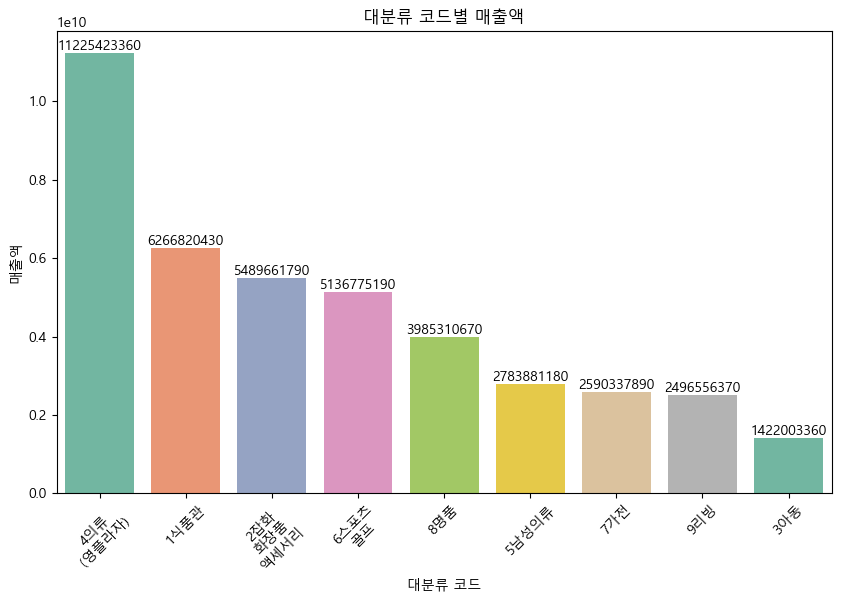

In [5]:
grouped = df.groupby('대분류코드')['총구매액'].sum()
grouped = grouped.sort_values(ascending=False)  # 매출액을 내림차순으로 정렬

# 그래프 그리기
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=grouped.index, y=grouped.values, palette='Set2')
plt.xticks(range(len(df['대분류코드'].unique())), [get_x_labels(str(code)) for code in df['대분류코드'].unique()])
plt.xlabel('대분류 코드')  # x축 레이블 설정
plt.ylabel('매출액')  # y축 레이블 설정
plt.title('대분류 코드별 매출액')  # 그래프 제목 설정
plt.xticks(rotation=45)  # x축 레이블 회전

# 값 표시
for i, value in enumerate(grouped.values):
    barplot.text(i, value, f'{value}', ha='center', va='bottom')


plt.show()


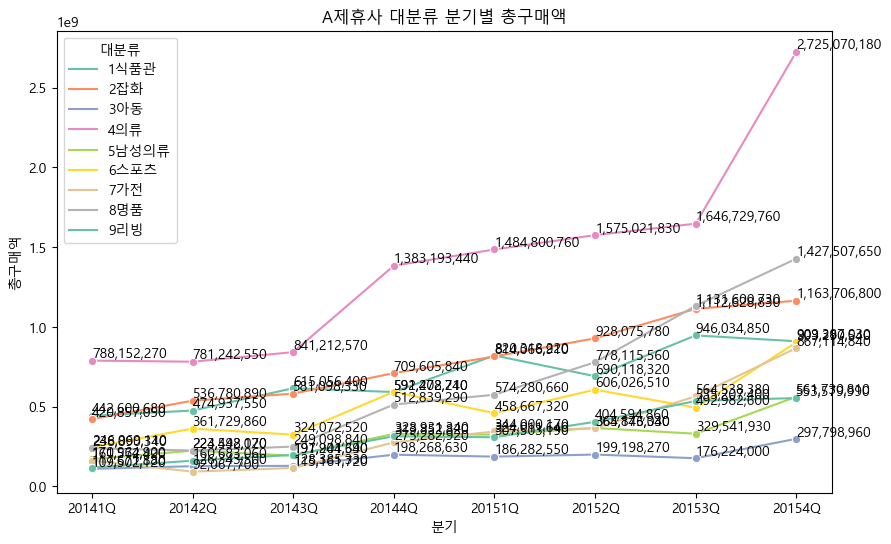

In [8]:
category_names = {
    '1': '1식품관',
    '2': '2잡화',
    '3': '3아동',
    '4': '4의류',
    '5': '5남성의류',
    '6': '6스포츠',
    '7': '7가전',
    '8': '8명품',
    '9': '9리빙'    
}

df_sum = df.groupby(['대분류코드', 'QYEAR'])['총구매액'].sum().reset_index()

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sum, x='QYEAR', y='총구매액', marker='o', hue='대분류코드', palette='Set2')
plt.title('A제휴사 대분류 분기별 총구매액')
plt.xlabel('분기')
plt.ylabel('총구매액')
# 각 데이터 포인트에 값을 표시
for i in range(len(df_sum)):
    plt.text(df_sum.loc[i, 'QYEAR'], df_sum.loc[i, '총구매액'], f"{df_sum.loc[i, '총구매액']:,}",
             horizontalalignment='left', verticalalignment='bottom')

# 범례에 대분류 이름 표시
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [category_names[label] for label in labels]
plt.legend(handles, new_labels, title='대분류')

plt.show()

In [9]:
cursor.execute('''
SELECT H.대그룹, D.QYEAR, D.대분류코드, SUM(D.구매금액) AS 총구매액
FROM HGROUP H, DEMOPURPROD D
WHERE H.고객번호 = D.고객번호 AND H.대그룹='기존고객' AND D.제휴사='A'
GROUP BY H.대그룹, D.QYEAR, D.대분류코드
ORDER BY QYEAR, 총구매액 DESC
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(x, columns=col_names)

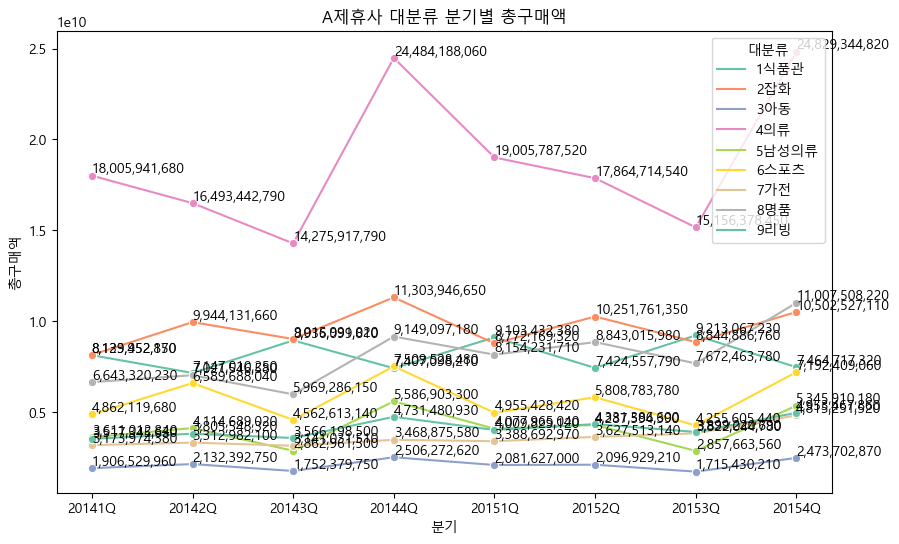

In [10]:
category_names = {
    '1': '1식품관',
    '2': '2잡화',
    '3': '3아동',
    '4': '4의류',
    '5': '5남성의류',
    '6': '6스포츠',
    '7': '7가전',
    '8': '8명품',
    '9': '9리빙'    
}

df_sum = df.groupby(['대분류코드', 'QYEAR'])['총구매액'].sum().reset_index()

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sum, x='QYEAR', y='총구매액', marker='o', hue='대분류코드', palette='Set2')
plt.title('A제휴사 대분류 분기별 총구매액')
plt.xlabel('분기')
plt.ylabel('총구매액')
# 각 데이터 포인트에 값을 표시
for i in range(len(df_sum)):
    plt.text(df_sum.loc[i, 'QYEAR'], df_sum.loc[i, '총구매액'], f"{df_sum.loc[i, '총구매액']:,}",
             horizontalalignment='left', verticalalignment='bottom')

# 범례에 대분류 이름 표시
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [category_names[label] for label in labels]
plt.legend(handles, new_labels, title='대분류')

plt.show()